<a href="https://colab.research.google.com/github/Shivam24012001/AutoElite-Sales-Performance-Analysis/blob/main/AutoElite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
Actual=pd.read_csv("https://raw.githubusercontent.com/Invact-Abhay/DOE/refs/heads/main/AutoElite_Actual.csv")
Budget=pd.read_csv("https://raw.githubusercontent.com/Invact-Abhay/DOE/refs/heads/main/AutoElite_Budget.csv")

In [4]:
Budget.head()

,Month,Region,State,Model,Budgeted Quantity
0,January,South,Tamil Nadu,Hatchback,12
1,January,South,Tamil Nadu,SUV,8
2,January,South,Tamil Nadu,Sedan,6
3,January,South,Karnataka,Hatchback,11
4,January,South,Karnataka,SUV,7


In [5]:
print(Actual.columns)
print(Budget.columns)

Index(['SN', 'Transaction Details', 'Date', 'Month', 'State', 'Region',
       'Model', 'Quantity Sold'],
      dtype='object')
Index(['Month', 'Region', 'State', 'Model', 'Budgeted Quantity'], dtype='object')


In [6]:
Actual.columns=Actual.columns.str.lower()
Budget.columns=Budget.columns.str.lower()
print(Actual.columns)
print(Budget.columns)

Index(['sn', 'transaction details', 'date', 'month', 'state', 'region',
       'model', 'quantity sold'],
      dtype='object')
Index(['month', 'region', 'state', 'model', 'budgeted quantity'], dtype='object')


In [7]:
Actual.columns=Actual.columns.str.replace(" ","")
Budget.columns=Budget.columns.str.replace(" ","")
print(Actual.columns)
print(Budget.columns)

Index(['sn', 'transactiondetails', 'date', 'month', 'state', 'region', 'model',
       'quantitysold'],
      dtype='object')
Index(['month', 'region', 'state', 'model', 'budgetedquantity'], dtype='object')


In [8]:
actual_quantity=Actual.groupby(['month','region','state','model'])['quantitysold'].sum().reset_index()
print(actual_quantity.head())

   month region        state      model  quantitysold
0  April   East  West Bengal  Hatchback            10
1  April   East  West Bengal        SUV             8
2  April   East  West Bengal      Sedan             5
3  April  North      Haryana  Hatchback             9
4  April  North      Haryana        SUV            16


In [9]:
merged_dataFram=pd.merge(Budget,actual_quantity,on=['month','state','region','model'],how='left')
print(merged_dataFram)

        month region          state      model  budgetedquantity  quantitysold
0     January  South     Tamil Nadu  Hatchback                12             9
1     January  South     Tamil Nadu        SUV                 8             8
2     January  South     Tamil Nadu      Sedan                 6             6
3     January  South      Karnataka  Hatchback                11             8
4     January  South      Karnataka        SUV                 7             9
..        ...    ...            ...        ...               ...           ...
355  December  North  Uttar Pradesh        SUV                 9             8
356  December  North  Uttar Pradesh      Sedan                 8            10
357  December   East    West Bengal  Hatchback                10             9
358  December   East    West Bengal        SUV                 9            13
359  December   East    West Bengal      Sedan                 9            10

[360 rows x 6 columns]


In [10]:
merged_dataFram['variance']=merged_dataFram['quantitysold']-merged_dataFram['budgetedquantity']
merged_dataFram

,month,region,state,model,budgetedquantity,quantitysold,variance
0,January,South,Tamil Nadu,Hatchback,12,9,-3
1,January,South,Tamil Nadu,SUV,8,8,0
2,January,South,Tamil Nadu,Sedan,6,6,0
3,January,South,Karnataka,Hatchback,11,8,-3
4,January,South,Karnataka,SUV,7,9,2
...,...,...,...,...,...,...,...
355,December,North,Uttar Pradesh,SUV,9,8,-1
356,December,North,Uttar Pradesh,Sedan,8,10,2
357,December,East,West Bengal,Hatchback,10,9,-1
358,December,East,West Bengal,SUV,9,13,4


In [11]:
monthMapping={'January':1,"February":2,"March":3,"April":4,"May":5,"June":6,"July":7,"August":8,"September":9,"October":10,"November":11,"December":12}
merged_dataFram['month_number']=merged_dataFram['month'].map(monthMapping)
merged_dataFram

,month,region,state,model,budgetedquantity,quantitysold,variance,month_number
0,January,South,Tamil Nadu,Hatchback,12,9,-3,1
1,January,South,Tamil Nadu,SUV,8,8,0,1
2,January,South,Tamil Nadu,Sedan,6,6,0,1
3,January,South,Karnataka,Hatchback,11,8,-3,1
4,January,South,Karnataka,SUV,7,9,2,1
...,...,...,...,...,...,...,...,...
355,December,North,Uttar Pradesh,SUV,9,8,-1,12
356,December,North,Uttar Pradesh,Sedan,8,10,2,12
357,December,East,West Bengal,Hatchback,10,9,-1,12
358,December,East,West Bengal,SUV,9,13,4,12


In [12]:
monthly_merged_table=merged_dataFram.groupby(['month_number','month'], as_index=False)['variance'].sum().sort_values(by='month_number',ascending=True)
monthly_merged_table


,month_number,month,variance
0,1,January,2
1,2,February,12
2,3,March,-19
3,4,April,-10
4,5,May,-91
5,6,June,-105
6,7,July,-86
7,8,August,-57
8,9,September,82
9,10,October,130


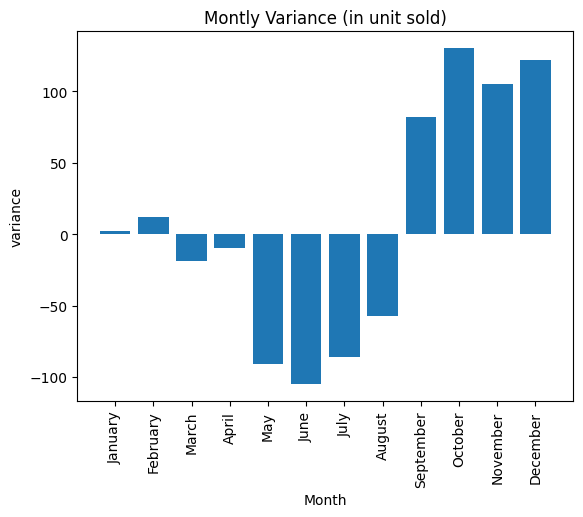

In [13]:
plt.bar(x=monthly_merged_table['month'],height=monthly_merged_table['variance'])
plt.xlabel("Month")
plt.ylabel("variance")
plt.title("Montly Variance (in unit sold)")
plt.xticks(monthly_merged_table['month'],rotation=90)
plt.show()

In [16]:
region_wise_variance_table=merged_dataFram.groupby(['region'])['variance'].sum().reset_index()
region_wise_variance_table

,region,variance
0,East,-70
1,North,71
2,South,118
3,West,-34


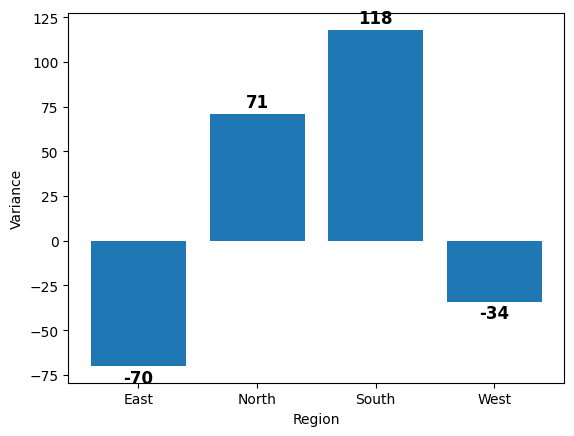

In [26]:
bars=plt.bar(x=region_wise_variance_table['region'],height=region_wise_variance_table['variance'])
plt.xlabel('Region')
plt.ylabel('Variance')
plt.xticks(region_wise_variance_table['region'],rotation=0)
plt.bar_label(bars,fmt="%d",fontsize=12,padding=2,label_type='edge',fontweight='bold')
plt.show()

In [27]:
state_wise_variance_table=merged_dataFram.groupby(['state'])['variance'].sum().reset_index()
state_wise_variance_table

,state,variance
0,Andhra Pradesh,54
1,Gujarat,-21
2,Haryana,3
3,Karnataka,55
4,Maharashtra,-29
5,Punjab,50
6,Rajasthan,-13
7,Tamil Nadu,38
8,Uttar Pradesh,18
9,West Bengal,-70


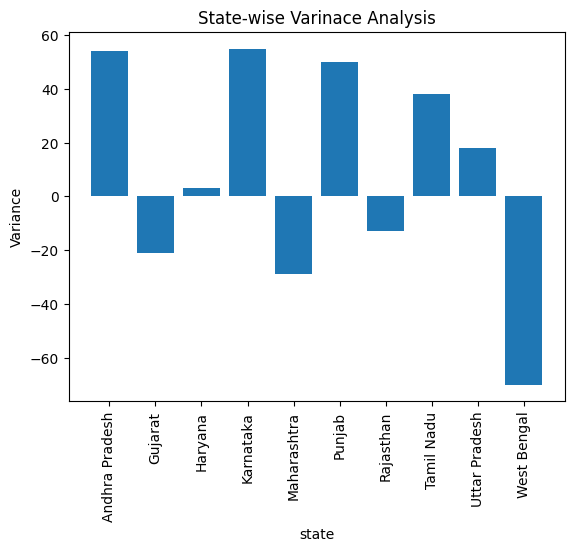

In [30]:
plt.bar(x=state_wise_variance_table['state'],height=state_wise_variance_table['variance'])
plt.xlabel("state")
plt.ylabel("Variance")
plt.title("State-wise Varinace Analysis")
plt.xticks(state_wise_variance_table['state'],rotation=90)
plt.show()